Section A
Question C

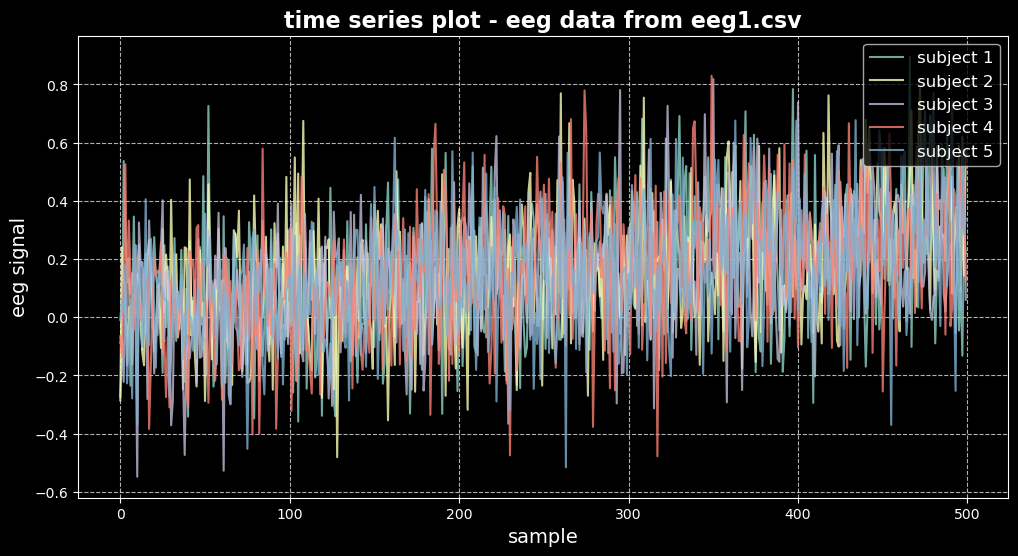

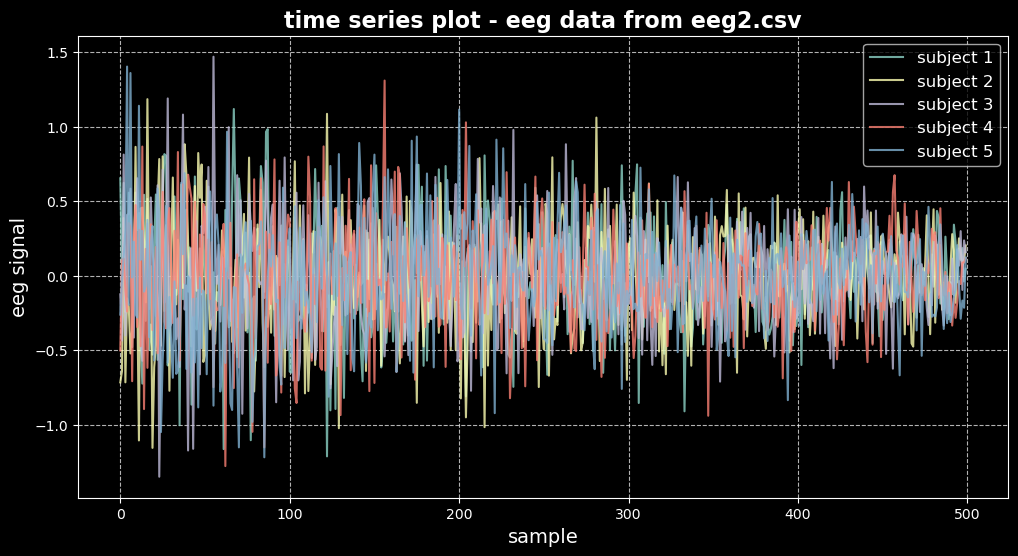

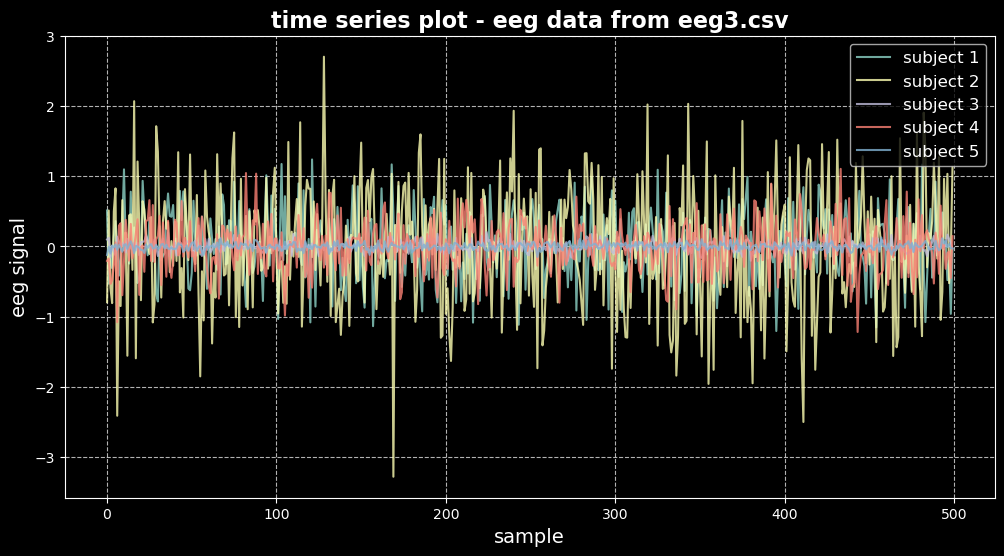

In [1]:
# importing pandas for data handling and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setting a dark background style for plots
plt.style.use('dark_background')

# reading eeg data from csv files into pandas dataframes
eeg1 = pd.read_csv('eeg1.csv', header=None)
eeg2 = pd.read_csv('eeg2.csv', header=None)
eeg3 = pd.read_csv('eeg3.csv', header=None)

# function to plot eeg data for a few subjects from a given dataset
def plot_eeg_data(data, title, subjects=5):
    plt.figure(figsize=(12, 6))  # set the figure size
    for i in range(min(subjects, data.shape[0])):  # loop through the specified number of subjects
        plt.plot(data.iloc[i], label=f'subject {i+1}', alpha=0.8)  # plot each subject's data
    plt.title(f'time series plot - {title}', fontsize=16, fontweight='bold')  # add a title
    plt.xlabel('sample', fontsize=14)  # label the x-axis
    plt.ylabel('eeg signal', fontsize=14)  # label the y-axis
    plt.legend(loc='upper right', fontsize=12)  # add a legend in the upper right corner
    plt.grid(True, linestyle='--', alpha=0.7)  # add a grid for better readability
    plt.show()  # display the plot

# plot the data for each eeg dataset
plot_eeg_data(eeg1, 'eeg data from eeg1.csv')
plot_eeg_data(eeg2, 'eeg data from eeg2.csv')
plot_eeg_data(eeg3, 'eeg data from eeg3.csv')


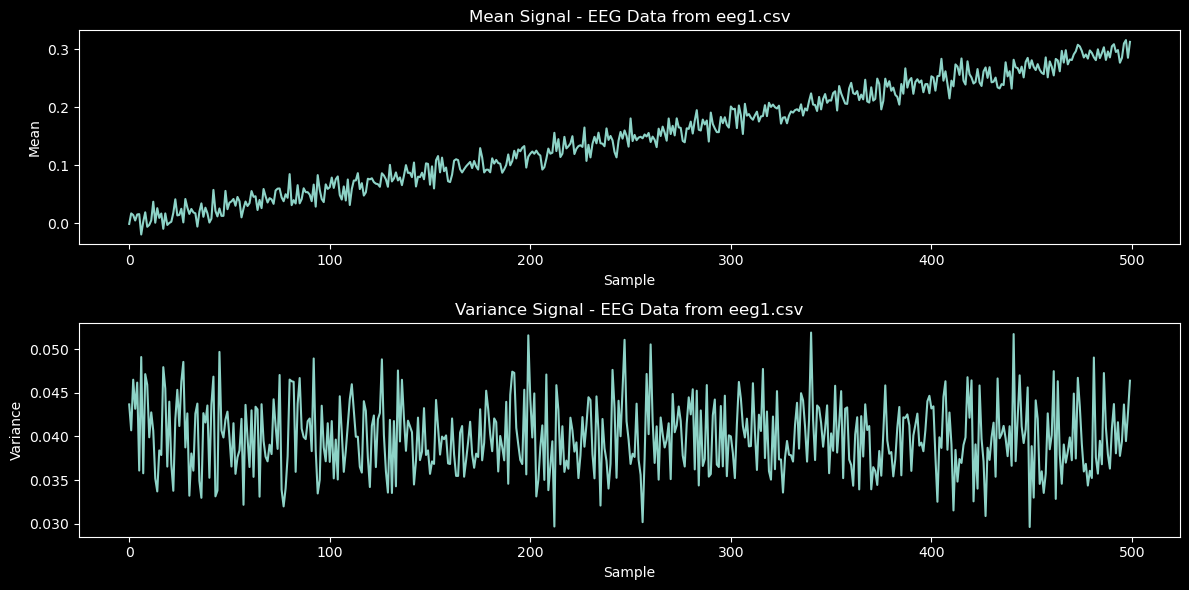

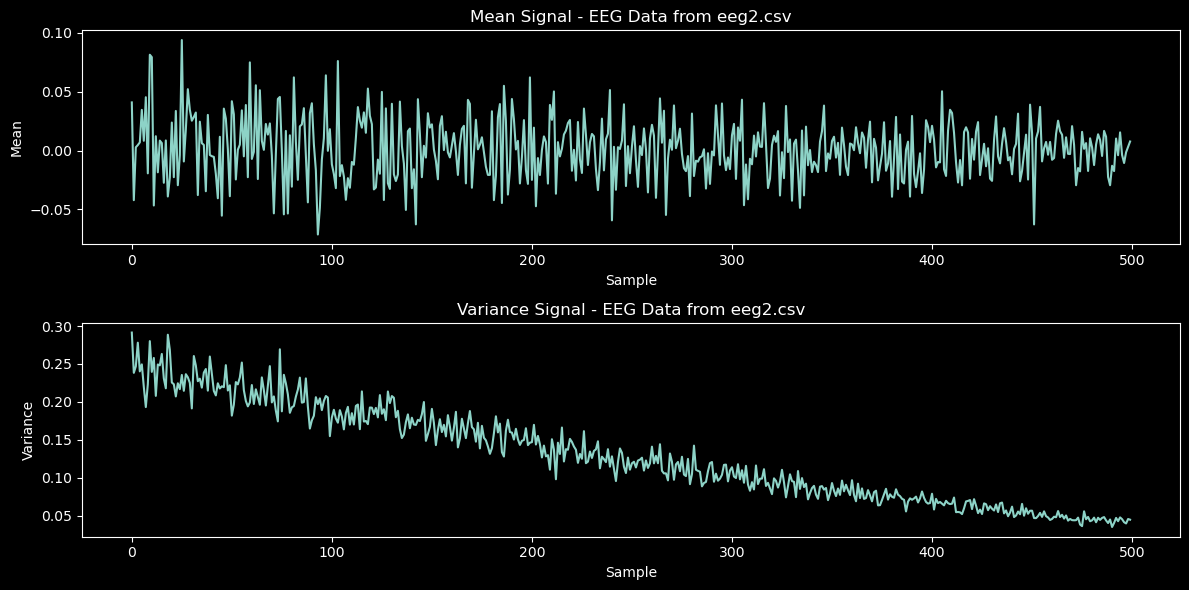

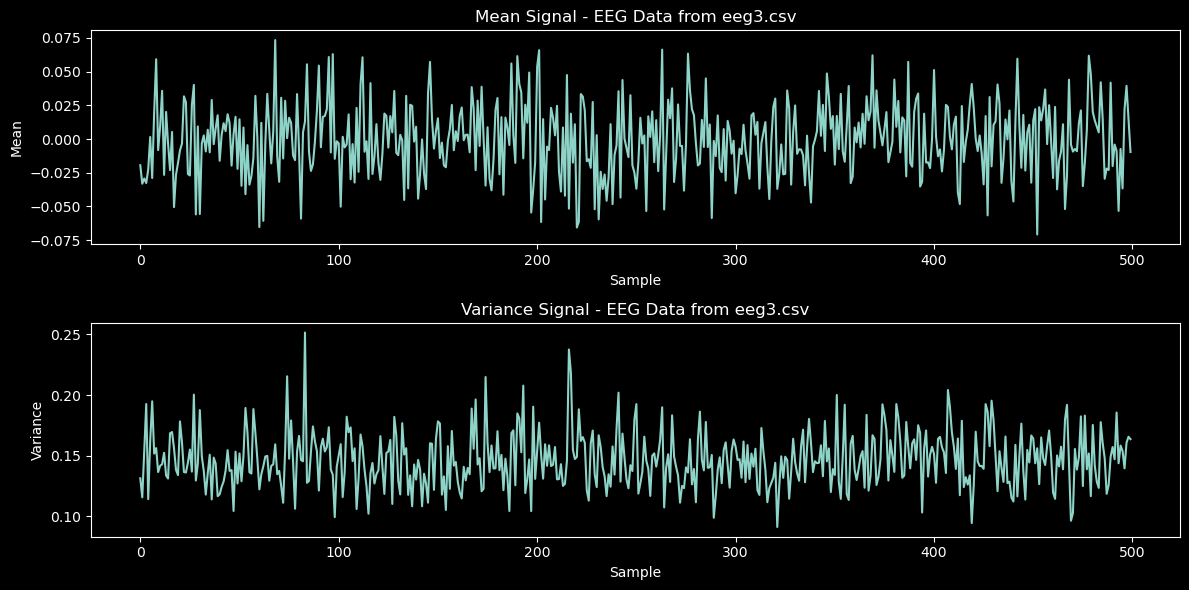

In [2]:
# plotting mean and variance for each signal to visually identify trends
def plot_mean_variance(data, title):
    mean_signal = data.mean(axis=0)
    variance_signal = data.var(axis=0)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(mean_signal)
    plt.title(f'Mean Signal - {title}')
    plt.xlabel('Sample')
    plt.ylabel('Mean')

    plt.subplot(2, 1, 2)
    plt.plot(variance_signal)
    plt.title(f'Variance Signal - {title}')
    plt.xlabel('Sample')
    plt.ylabel('Variance')

    plt.tight_layout()
    plt.show()

plot_mean_variance(eeg1, 'EEG Data from eeg1.csv')
plot_mean_variance(eeg2, 'EEG Data from eeg2.csv')
plot_mean_variance(eeg3, 'EEG Data from eeg3.csv')

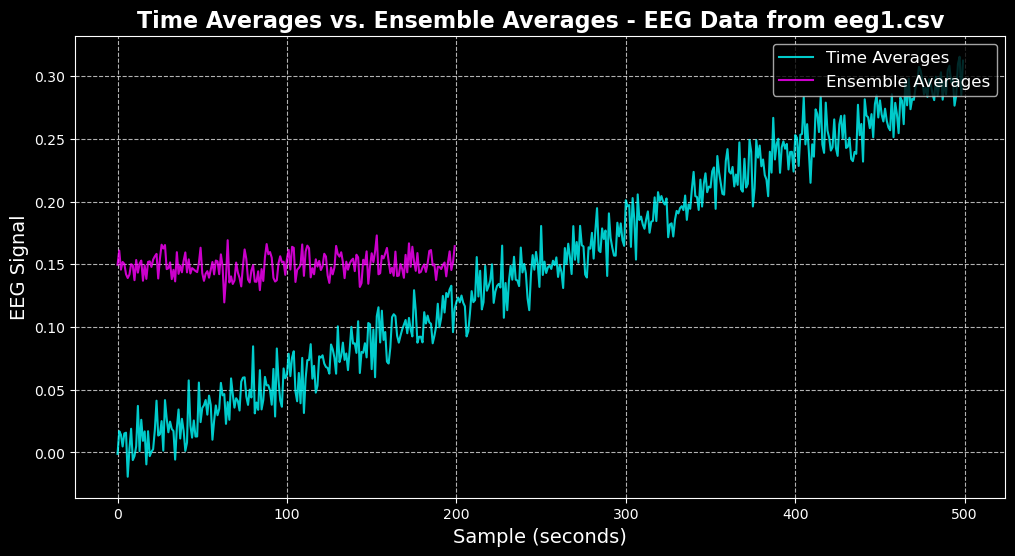

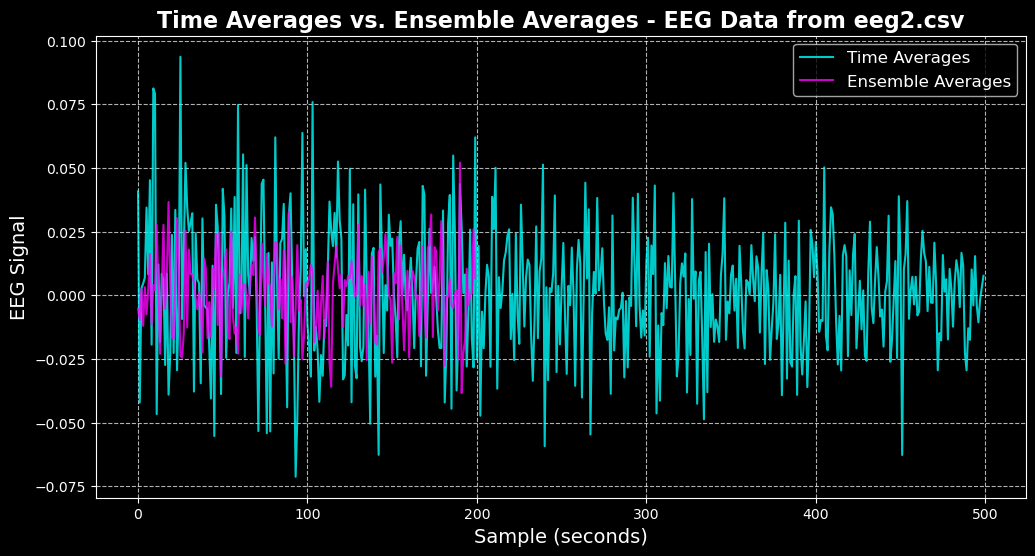

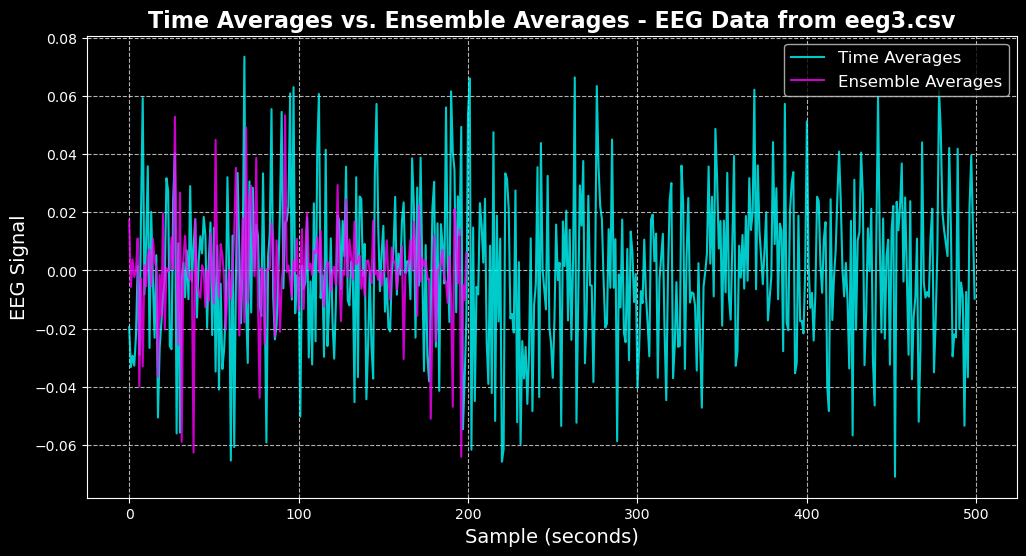

In [3]:
# defining a function for creating time vs ensemble average graphs
def plot_time_vs_ensemble_averages(data, title):
    time_averages = data.mean(axis=1)
    ensemble_averages = data.mean(axis=0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(ensemble_averages, label='Time Averages', alpha=0.8, color='cyan')
    plt.plot(time_averages, label='Ensemble Averages', alpha=0.8, color='magenta')
    plt.title(f'Time Averages vs. Ensemble Averages - {title}', fontsize=16, fontweight='bold')
    plt.xlabel('Sample (seconds)', fontsize=14)
    plt.ylabel('EEG Signal', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# plotting time vs ensemble averages for EEG data from eeg1.csv
plot_time_vs_ensemble_averages(eeg1, 'EEG Data from eeg1.csv')

# plotting time vs ensemble averages for EEG data from eeg2.csv
plot_time_vs_ensemble_averages(eeg2, 'EEG Data from eeg2.csv')

# plotting time vs ensemble averages for EEG data from eeg3.csv
plot_time_vs_ensemble_averages(eeg3, 'EEG Data from eeg3.csv')


In [4]:
# defining a function to calculate Eb parameter
def calculate_eb(data):
    total_variance = np.var(data.values, axis=1)
    subsample_variances = []
    num_subsamples = data.shape[1] // 100  # Assuming 500 samples per subject, 5 segments of 100 samples each
    for i in range(num_subsamples):
        subsample = data.iloc[:, i*100:(i+1)*100]
        subsample_variance = np.var(subsample.values, axis=1)
        subsample_variances.append(subsample_variance)
    
    avg_subsample_variance = np.mean(subsample_variances, axis=0)
    eb = np.mean(avg_subsample_variance - total_variance) / np.mean(total_variance)
    
    return eb

# calculating eb for each dataset
eb1 = calculate_eb(eeg1)
eb2 = calculate_eb(eeg2)
eb3 = calculate_eb(eeg3)

print(f'Eb for eeg1.csv: {eb1}')
print(f'Eb for eeg2.csv: {eb2}')
print(f'Eb for eeg3.csv: {eb3}')


Eb for eeg1.csv: -0.16033470000193384
Eb for eeg2.csv: -0.00828354900337401
Eb for eeg3.csv: -0.008268231991924446


Section 2 Question A.

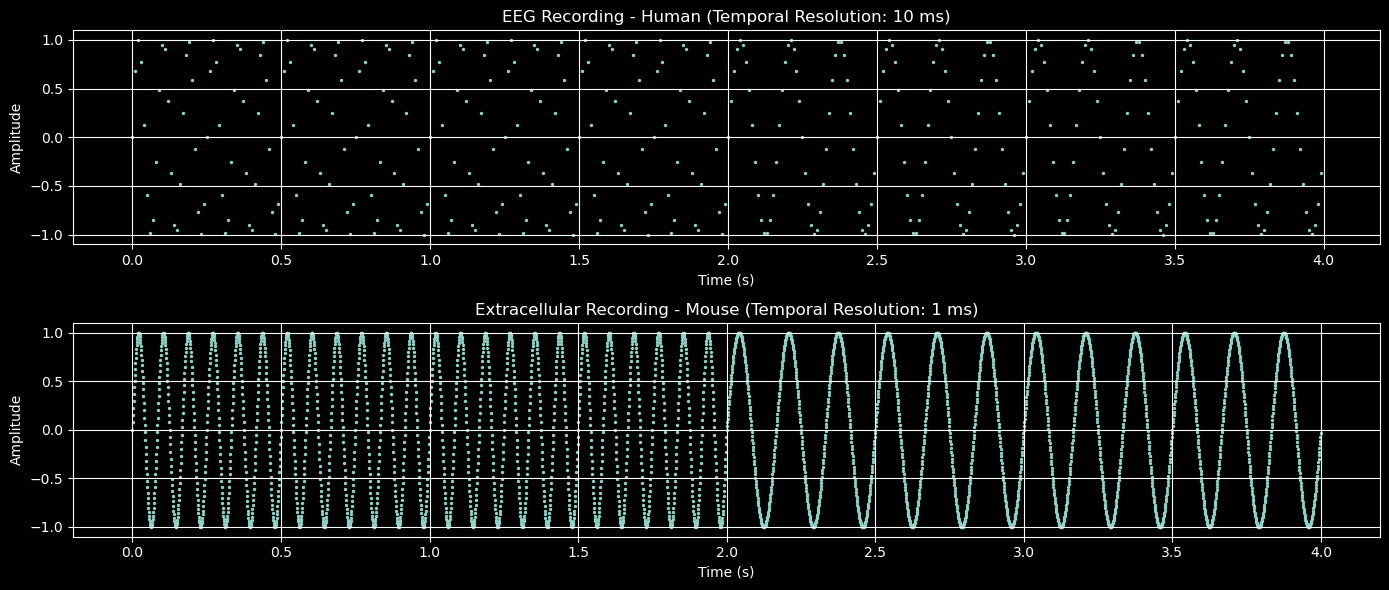

In [5]:
# defining parameters
duration = 4  # seconds (2 seconds alpha, 2 seconds theta)
frequency_alpha = 12  # Hz
frequency_theta = 6  # Hz
amplitude = 1  # normalized amplitude

# defining time vectors
time_human = np.arange(0, duration, 0.01)  # 10 ms resolution
time_mouse = np.arange(0, duration, 0.001)  # 1 ms resolution

# generating alpha and theta waves for human EEG
alpha_wave_human = amplitude * np.sin(2 * np.pi * frequency_alpha * time_human[:len(time_human)//2])
theta_wave_human = amplitude * np.sin(2 * np.pi * frequency_theta * time_human[len(time_human)//2:])
signal_human = np.concatenate((alpha_wave_human, theta_wave_human))

# generating alpha and theta waves for mouse extracellular recordings
alpha_wave_mouse = amplitude * np.sin(2 * np.pi * frequency_alpha * time_mouse[:len(time_mouse)//2])
theta_wave_mouse = amplitude * np.sin(2 * np.pi * frequency_theta * time_mouse[len(time_mouse)//2:])
signal_mouse = np.concatenate((alpha_wave_mouse, theta_wave_mouse))

# plotting
plt.figure(figsize=(14, 6))

# human EEG plot
plt.subplot(2, 1, 1)
plt.scatter(time_human, signal_human, s=2)
plt.title('EEG Recording - Human (Temporal Resolution: 10 ms)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# mouse extracellular recording plot
plt.subplot(2, 1, 2)
plt.scatter(time_mouse, signal_mouse, s=2)
plt.title('Extracellular Recording - Mouse (Temporal Resolution: 1 ms)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


Section 2 Question B

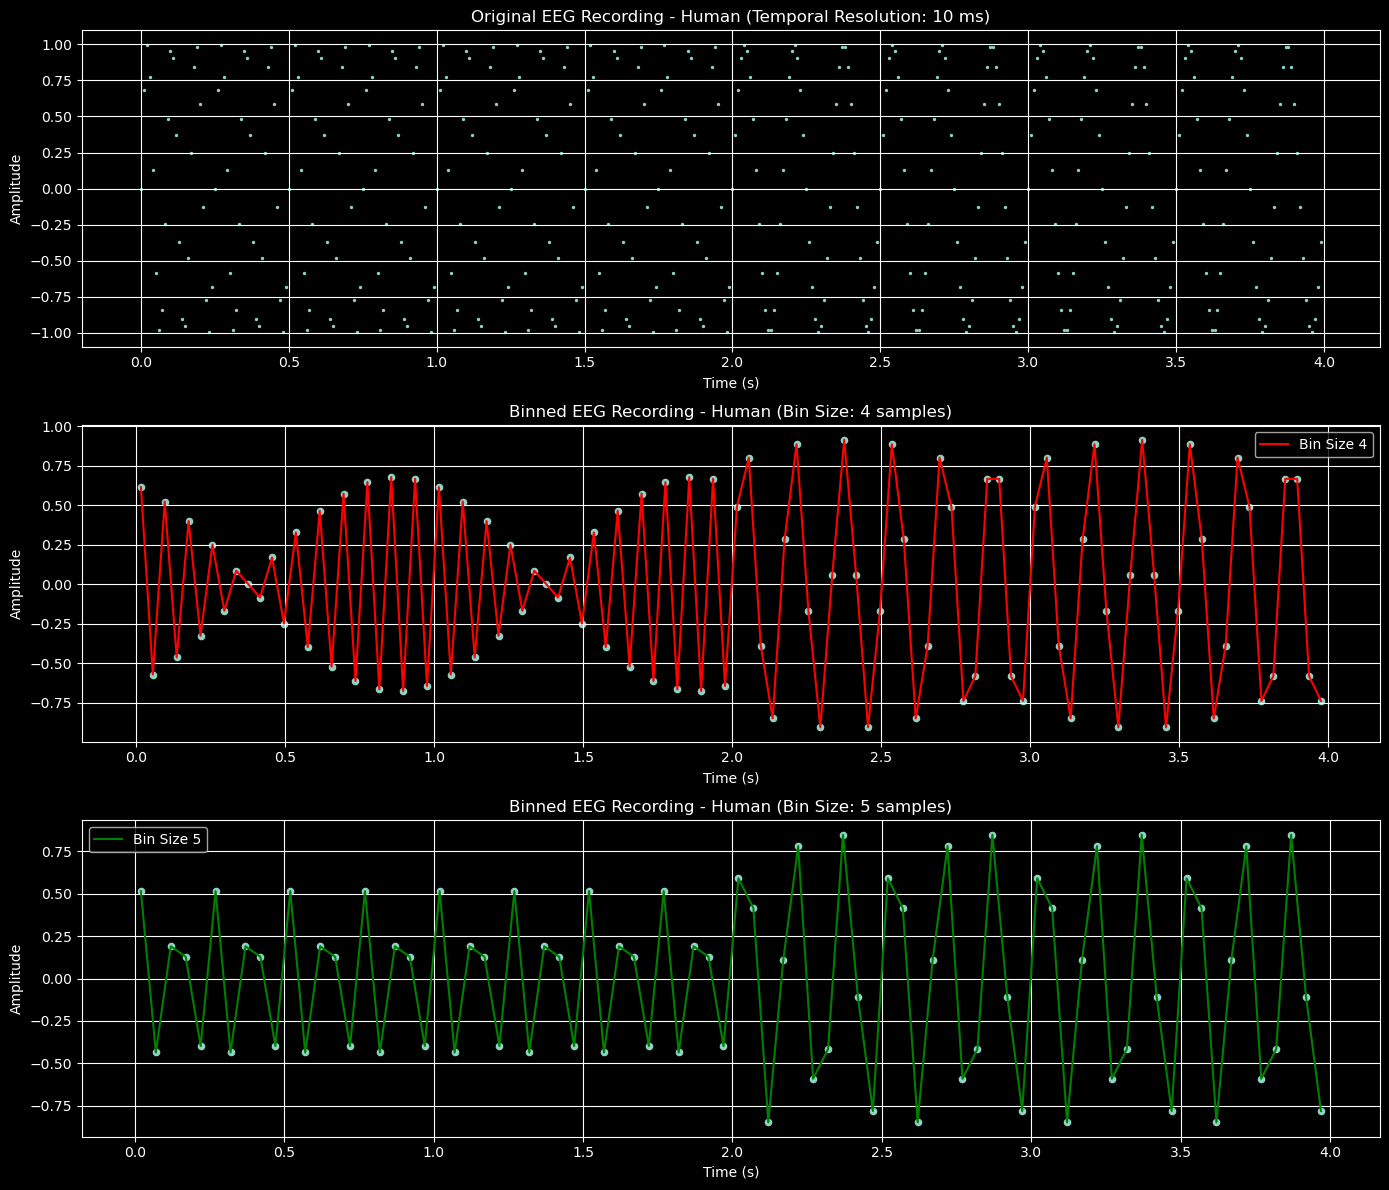

In [6]:
# defining binning function
def bin_averages(signal, bin_size):
    binned_signal = [np.mean(signal[i:i+bin_size]) for i in range(0, len(signal), bin_size)]
    binned_time = [np.mean(time_human[i:i+bin_size]) for i in range(0, len(time_human), bin_size)]
    return np.array(binned_time), np.array(binned_signal)

# defining bin sizes
bin_size_4 = 4
bin_size_5 = 5

# binned data
time_binned_4, signal_binned_4 = bin_averages(signal_human, bin_size_4)
time_binned_5, signal_binned_5 = bin_averages(signal_human, bin_size_5)

# plotting
plt.figure(figsize=(14, 12))

# original signal scatter plot
plt.subplot(3, 1, 1)
plt.scatter(time_human, signal_human, s=2)
plt.title('Original EEG Recording - Human (Temporal Resolution: 10 ms)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# binned signal (bin size 4) scatter plot
plt.subplot(3, 1, 2)
plt.scatter(time_binned_4, signal_binned_4, s=20)
plt.plot(time_binned_4, signal_binned_4, label='Bin Size 4', color='red')
plt.title('Binned EEG Recording - Human (Bin Size: 4 samples)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# binned signal (bin size 5) scatter plot
plt.subplot(3, 1, 3)
plt.scatter(time_binned_5, signal_binned_5, s=20)
plt.plot(time_binned_5, signal_binned_5, label='Bin Size 5', color='green')
plt.title('Binned EEG Recording - Human (Bin Size: 5 samples)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:

# Binning function
def bin_averages(signal, bin_size, time_vector):
    binned_signal = [np.mean(signal[i:i+bin_size]) for i in range(0, len(signal), bin_size)]
    binned_time = [np.mean(time_vector[i:i+bin_size]) for i in range(0, len(time_vector), bin_size)]
    return np.array(binned_time), np.array(binned_signal)

# Binned data for human EEG
time_binned_4_human, signal_binned_4_human = bin_averages(signal_human, bin_size_4, time_human)
time_binned_5_human, signal_binned_5_human = bin_averages(signal_human, bin_size_5, time_human)

# Binned data for mouse extracellular recordings
time_binned_4_mouse, signal_binned_4_mouse = bin_averages(signal_mouse, bin_size_4, time_mouse)
time_binned_5_mouse, signal_binned_5_mouse = bin_averages(signal_mouse, bin_size_5, time_mouse)


def calculate_snr(original_signal, binned_signal):
    signal_power = np.mean(original_signal**2)
    noise_power = np.mean((original_signal - binned_signal)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate SNR for human EEG
snr_human_bin_4 = calculate_snr(signal_human, np.interp(time_human, time_binned_4_human, signal_binned_4_human))
snr_human_bin_5 = calculate_snr(signal_human, np.interp(time_human, time_binned_5_human, signal_binned_5_human))

# Calculate SNR for mouse extracellular recordings
snr_mouse_bin_4 = calculate_snr(signal_mouse, np.interp(time_mouse, time_binned_4_mouse, signal_binned_4_mouse))
snr_mouse_bin_5 = calculate_snr(signal_mouse, np.interp(time_mouse, time_binned_5_mouse, signal_binned_5_mouse))

print(f'SNR for Human EEG with Bin Size 4: {snr_human_bin_4:.2f} dB')
print(f'SNR for Human EEG with Bin Size 5: {snr_human_bin_5:.2f} dB')
print(f'SNR for Mouse Recording with Bin Size 4: {snr_mouse_bin_4:.2f} dB')
print(f'SNR for Mouse Recording with Bin Size 5: {snr_mouse_bin_5:.2f} dB')


SNR for Human EEG with Bin Size 4: 4.96 dB
SNR for Human EEG with Bin Size 5: 3.07 dB
SNR for Mouse Recording with Bin Size 4: 40.86 dB
SNR for Mouse Recording with Bin Size 5: 37.17 dB


Section 2 Question C

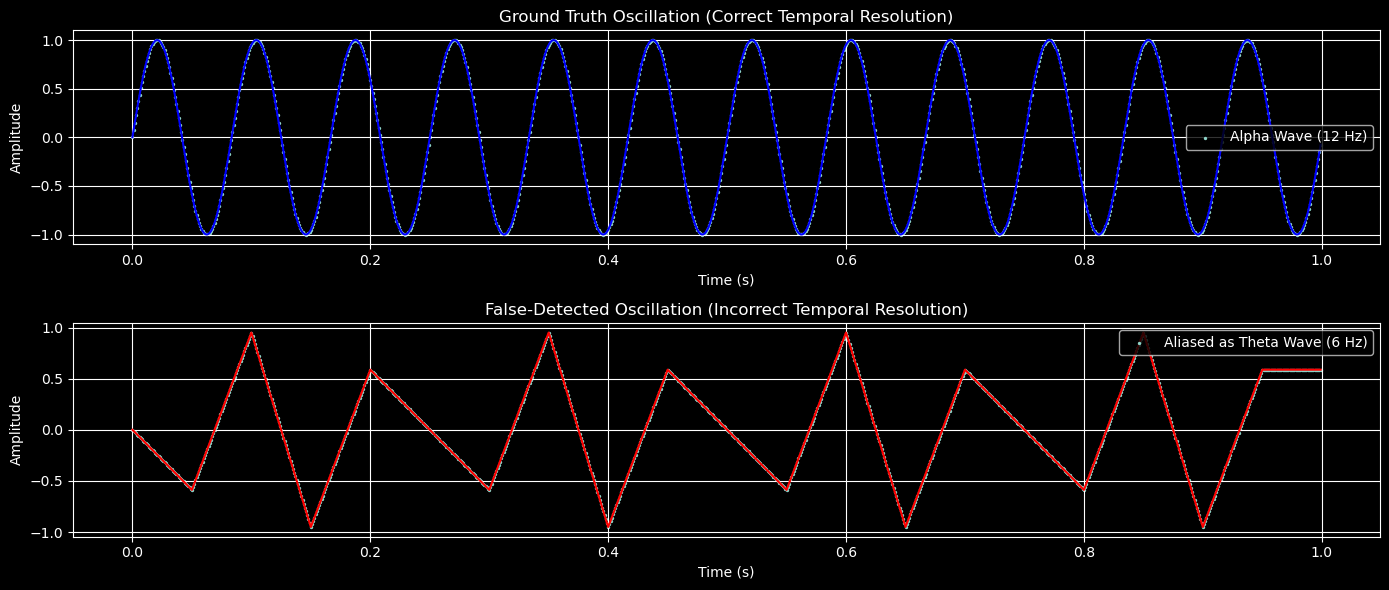

In [8]:
duration = 1  # seconds

# setting correct temporal resolution
correct_resolution = 0.001  # 1 ms resolution
time_correct = np.arange(0, duration, correct_resolution)
signal_alpha = amplitude * np.sin(2 * np.pi * frequency_alpha * time_correct)

# setting incorrect temporal resolution (leading to aliasing)
incorrect_resolution = 0.05  # 50 ms resolution
time_incorrect = np.arange(0, duration, incorrect_resolution)
signal_alias = amplitude * np.sin(2 * np.pi * frequency_alpha * time_incorrect)

# interpolating the false-detected oscillation (appears as theta)
time_interpolated = np.arange(0, duration, correct_resolution)
signal_theta_interpolated = np.interp(time_interpolated, time_incorrect, signal_alias)

# plotting
plt.figure(figsize=(14, 6))

# ground truth oscillation (alpha wave)
plt.subplot(2, 1, 1)
plt.scatter(time_correct, signal_alpha, s=2, label='Alpha Wave (12 Hz)')
plt.plot(time_correct, signal_alpha, color='blue')
plt.title('Ground Truth Oscillation (Correct Temporal Resolution)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# false-detected oscillation (appears as theta wave due to aliasing)
plt.subplot(2, 1, 2)
plt.scatter(time_interpolated, signal_theta_interpolated, s=2, label='Aliased as Theta Wave (6 Hz)')
plt.plot(time_interpolated, signal_theta_interpolated, color='red')
plt.title('False-Detected Oscillation (Incorrect Temporal Resolution)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Section 2 Question D

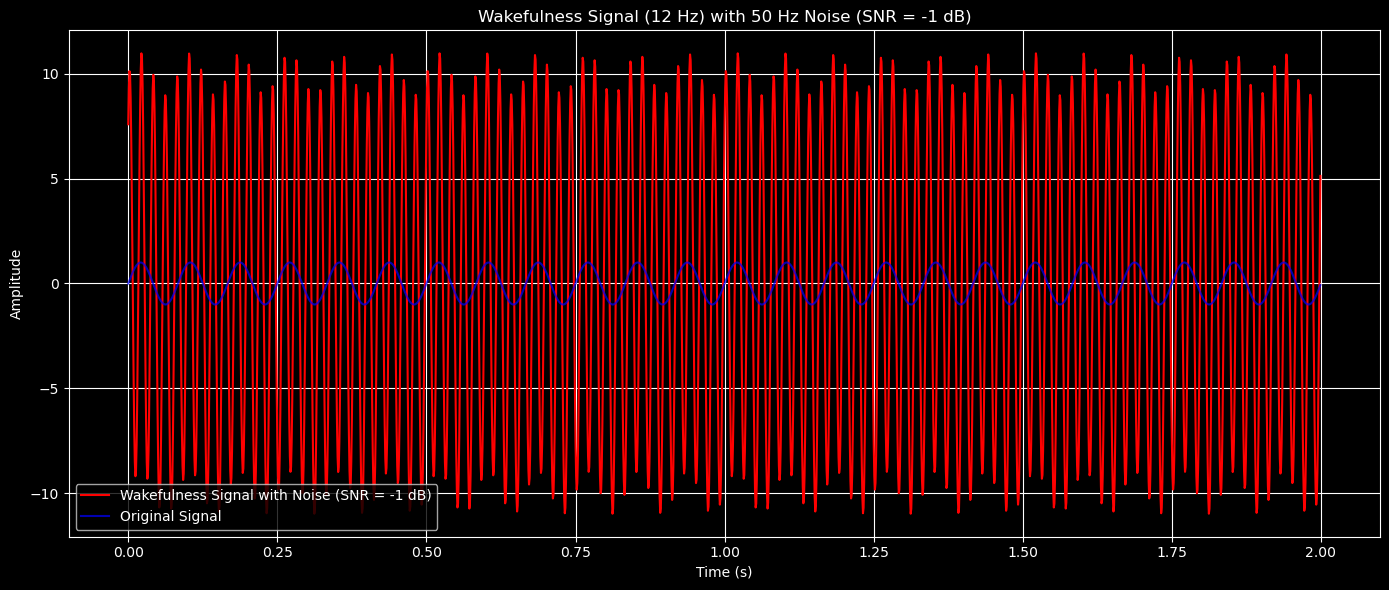

In [9]:
duration = 2  # seconds (for clarity in visualization)
frequency_wakefulness = 12  # Hz (wakefulness signal frequency)
frequency_noise = 50  # Hz (noise frequency)
SNR_dB = -1  # desired SNR in dB
amplitude_signal = 1  # normalized amplitude of the wakefulness signal


# time vector
sampling_rate = 1000  # Hz (1 ms resolution)
time = np.arange(0, duration, 1/sampling_rate)

# generate wakefulness signal (12 Hz sine wave)
signal = amplitude_signal * np.sin(2 * np.pi * frequency_wakefulness * time)

# calculate noise amplitude to achieve SNR of -1 dB
noise_amplitude = amplitude_signal * 10  # 10 times the signal amplitude

# generate noise signal (50 Hz sine wave with random phase)
random_phase = np.random.uniform(0, 2*np.pi)
noise = noise_amplitude * np.sin(2 * np.pi * frequency_noise * time + random_phase)

# combine signal and noise to get the desired SNR
combined_signal = signal + noise

# plotting
plt.figure(figsize=(14, 6))

# plot wakefulness signal with noise
plt.plot(time, combined_signal, label='Wakefulness Signal with Noise (SNR = -1 dB)', color='red')
plt.plot(time, signal, label='Original Signal', color='blue', alpha=0.7)
plt.title('Wakefulness Signal (12 Hz) with 50 Hz Noise (SNR = -1 dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Section 2 Question E

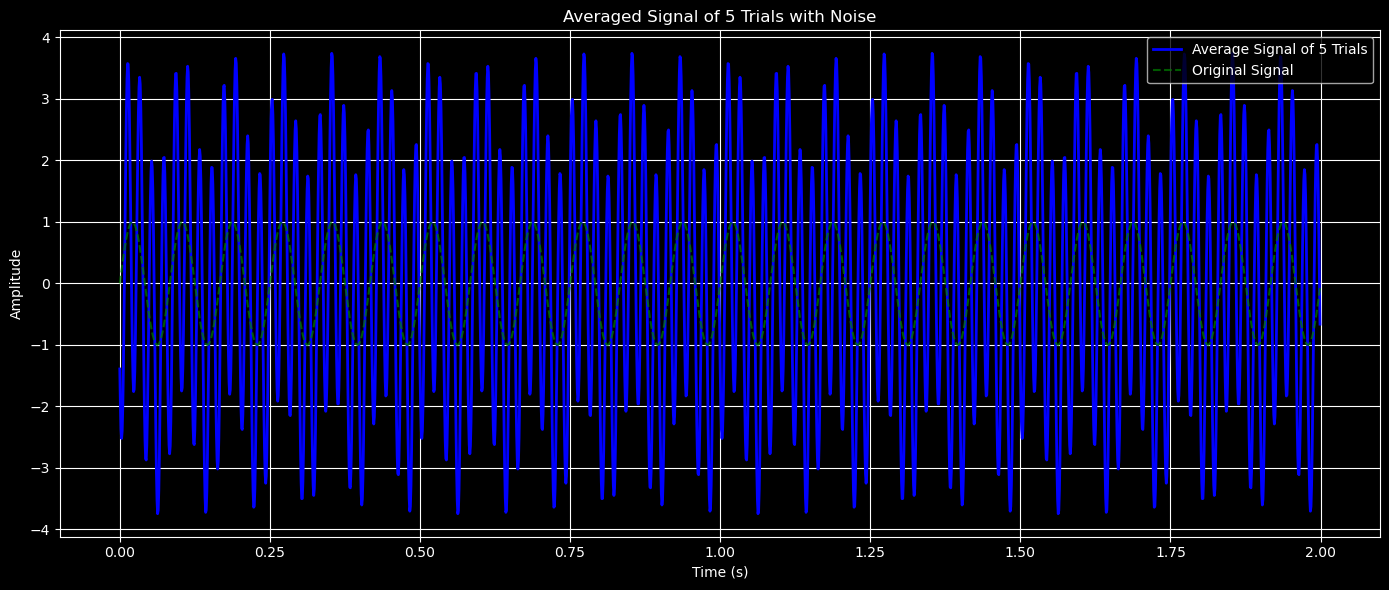

SNR of the averaged signal: -8.82 dB


In [10]:
duration = 2  # seconds
sampling_rate = 1000  # Hz (1 ms resolution)
num_trials = 5  # number of trials
noise_amplitude = 10  # 10 times the signal amplitude for SNR of -1 dB

# time vector
time = np.arange(0, duration, 1/sampling_rate)

# function to generate a single trial with noise
def generate_trial():
    signal = amplitude_signal * np.sin(2 * np.pi * frequency_wakefulness * time)
    random_phase = np.random.uniform(0, 2*np.pi)  # Different random phase for each trial
    noise = noise_amplitude * np.sin(2 * np.pi * frequency_noise * time + random_phase)
    combined_signal = signal + noise
    return combined_signal

# generate multiple trials
trials = [generate_trial() for _ in range(num_trials)]

# calculate the average signal
average_signal = np.mean(trials, axis=0)


# ground truth wakefulness signal (for SNR calculation)
signal = amplitude_signal * np.sin(2 * np.pi * frequency_wakefulness * time)

# calculate SNR of the average signal
snr_average = calculate_snr(signal, average_signal)

# Plotting the average signal
plt.figure(figsize=(14, 6))
plt.plot(time, average_signal, label='Average Signal of 5 Trials', color='blue', linewidth=2)
plt.plot(time, signal, label='Original Signal', color='green', linestyle='--', alpha=0.7)
plt.title('Averaged Signal of 5 Trials with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'SNR of the averaged signal: {snr_average:.2f} dB')


Section 2 Question F

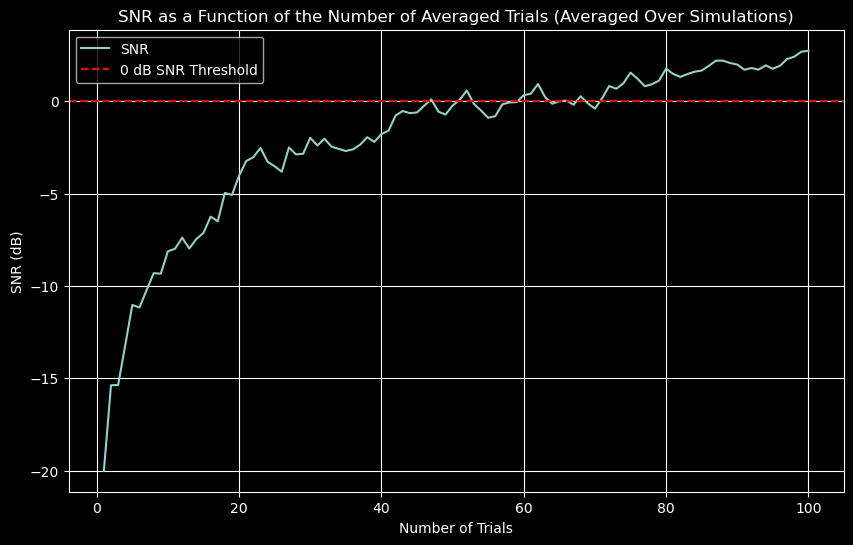

Minimum number of trials needed for SNR >= 0 dB: 47


In [11]:
# Perform multiple simulations
num_simulations = 20  # number of simulations to average results
max_trials = 100  # maximum number of trials

all_snr_values = []
for _ in range(num_simulations):
    # Generate multiple trials
    trials = [generate_trial() for _ in range(max_trials)]

    # Ground truth wakefulness signal (for SNR calculation)
    signal = amplitude_signal * np.sin(2 * np.pi * frequency_wakefulness * time)

    # Calculate SNR for different numbers of averaged trials
    snr_values = []
    for num_trials in range(1, max_trials + 1):
        averaged_signal = np.mean(trials[:num_trials], axis=0)
        snr = calculate_snr(signal, averaged_signal)
        snr_values.append(snr)
    
    all_snr_values.append(snr_values)

# Average SNR values across all simulations
avg_snr_values = np.mean(all_snr_values, axis=0)

# Plotting SNR as a function of the number of trials
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_trials + 1), avg_snr_values, label='SNR')
plt.axhline(y=0, color='r', linestyle='--', label='0 dB SNR Threshold')
plt.title('SNR as a Function of the Number of Averaged Trials (Averaged Over Simulations)')
plt.xlabel('Number of Trials')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Determine the minimum number of trials needed for SNR >= 0 dB
min_trials_for_0dB_SNR = next(i for i, snr in enumerate(avg_snr_values, 1) if snr >= 0)
print(f'Minimum number of trials needed for SNR >= 0 dB: {min_trials_for_0dB_SNR}')

Section 3 Question A

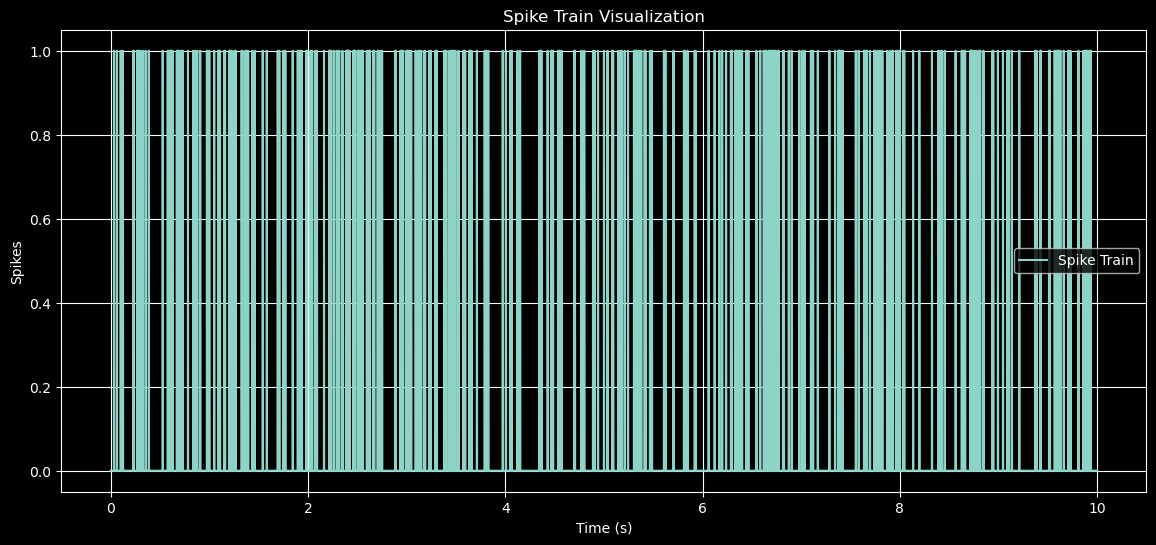

Mean Firing Rate: 32.4 Hz


In [12]:
# loading spike times
spike_times = pd.read_csv('spk_times.csv', header=None).values.flatten()

# parameters
duration = 10  # seconds
bin_size = 0.001  # seconds (1 ms)
num_bins = int(duration / bin_size)

# generate spike train
spike_train = np.zeros(num_bins)
bin_edges = np.arange(0, duration + bin_size, bin_size)
spike_indices = np.digitize(spike_times, bin_edges) - 1

# ensure the indices are within the valid range
spike_indices = spike_indices[spike_indices < num_bins]

# populate the spike train
spike_train[spike_indices] = 1

# plot the spike train
plt.figure(figsize=(14, 6))
plt.plot(np.arange(num_bins) * bin_size, spike_train, label='Spike Train')
plt.title('Spike Train Visualization')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.legend()
plt.grid(True)
plt.show()

# calculate mean firing rate
mean_firing_rate = np.sum(spike_train) / duration
print(f'Mean Firing Rate: {mean_firing_rate} Hz')


Section 3 Question B

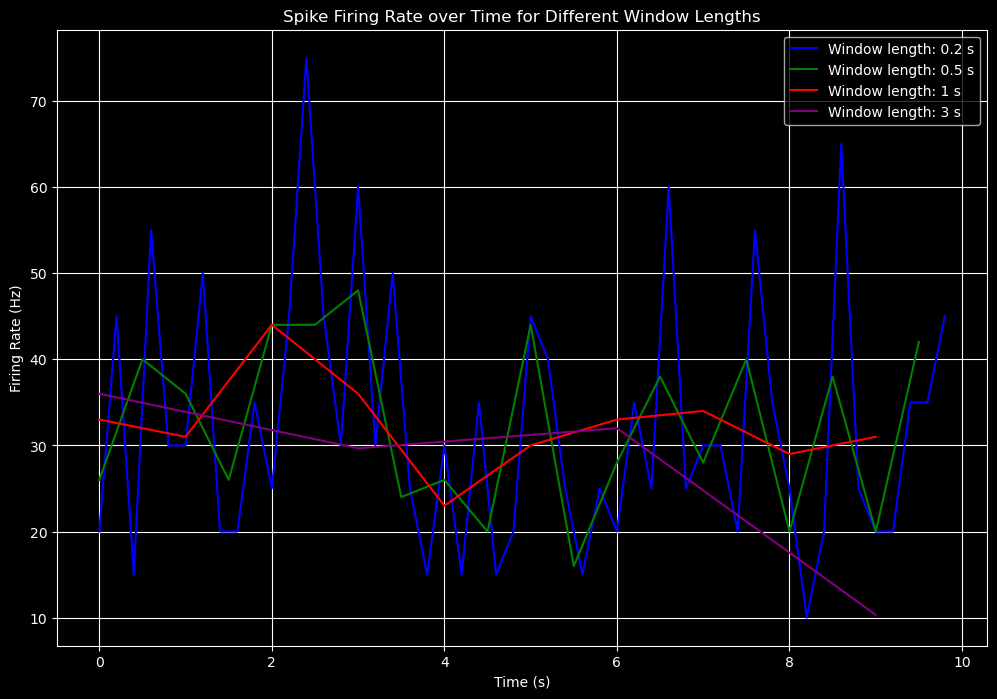

In [13]:
# function to calculate firing rate
def firing_rate(spike_train, window_length, bin_size):
    num_bins = len(spike_train)
    window_size = int(window_length / bin_size)
    firing_rates = [np.sum(spike_train[i:i+window_size]) / window_length for i in range(0, num_bins, window_size)]
    time_bins = [i * bin_size for i in range(0, num_bins, window_size)]
    return time_bins[:len(firing_rates)], firing_rates

# window lengths
window_lengths = [0.2, 0.5, 1, 3]  # seconds
colors = ['blue', 'green', 'red', 'purple']

# plot firing rates for different window lengths
plt.figure(figsize=(12, 8))

for window_length, color in zip(window_lengths, colors):
    time_bins, rates = firing_rate(spike_train, window_length, bin_size)
    plt.plot(time_bins, rates, label=f'Window length: {window_length} s', color=color)

plt.title('Spike Firing Rate over Time for Different Window Lengths')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True)
plt.show()


Section 3 Question C

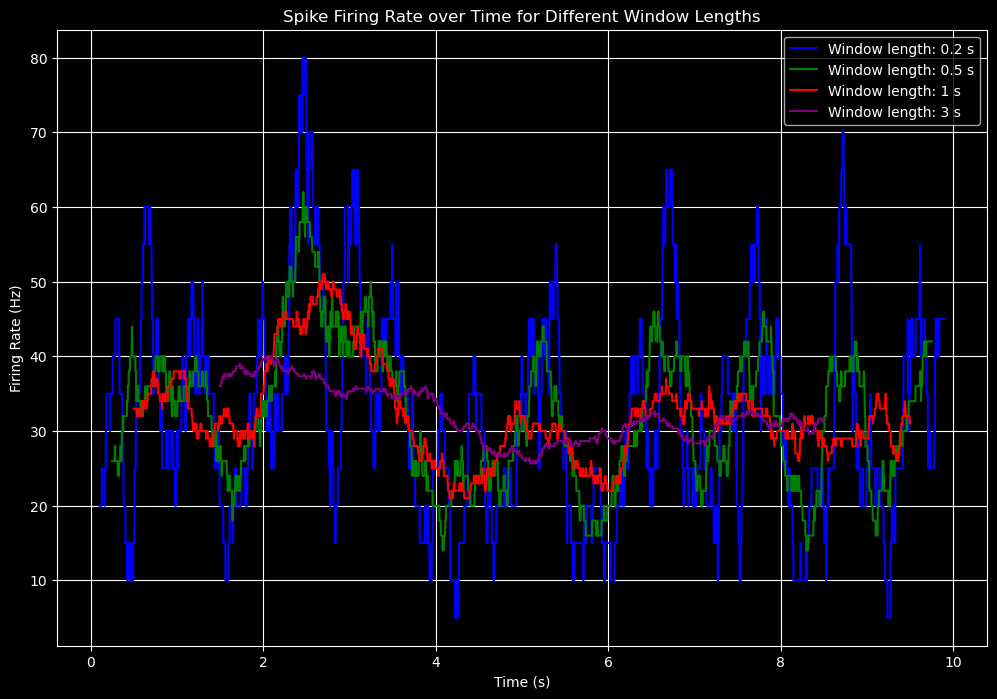

In [14]:
# adjusted function to calculate firing rate using sliding window
def sliding_firing_rate(spike_train, window_length, bin_size):
    window_size = int(window_length / bin_size)
    num_bins = len(spike_train)
    firing_rates = []
    time_bins = []
    
    for i in range(num_bins - window_size + 1):
        firing_rates.append(np.sum(spike_train[i:i + window_size]) / window_length)
        time_bins.append(i * bin_size + window_length / 2)
    
    return time_bins, firing_rates

# window lengths
window_lengths = [0.2, 0.5, 1, 3]  # seconds
colors = ['blue', 'green', 'red', 'purple']

# plot firing rates for different window lengths
plt.figure(figsize=(12, 8))

for window_length, color in zip(window_lengths, colors):
    time_bins, rates = sliding_firing_rate(spike_train, window_length, bin_size)
    plt.plot(time_bins, rates, label=f'Window length: {window_length} s', color=color)

plt.title('Spike Firing Rate over Time for Different Window Lengths')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True)
plt.show()


Section 3 Question D

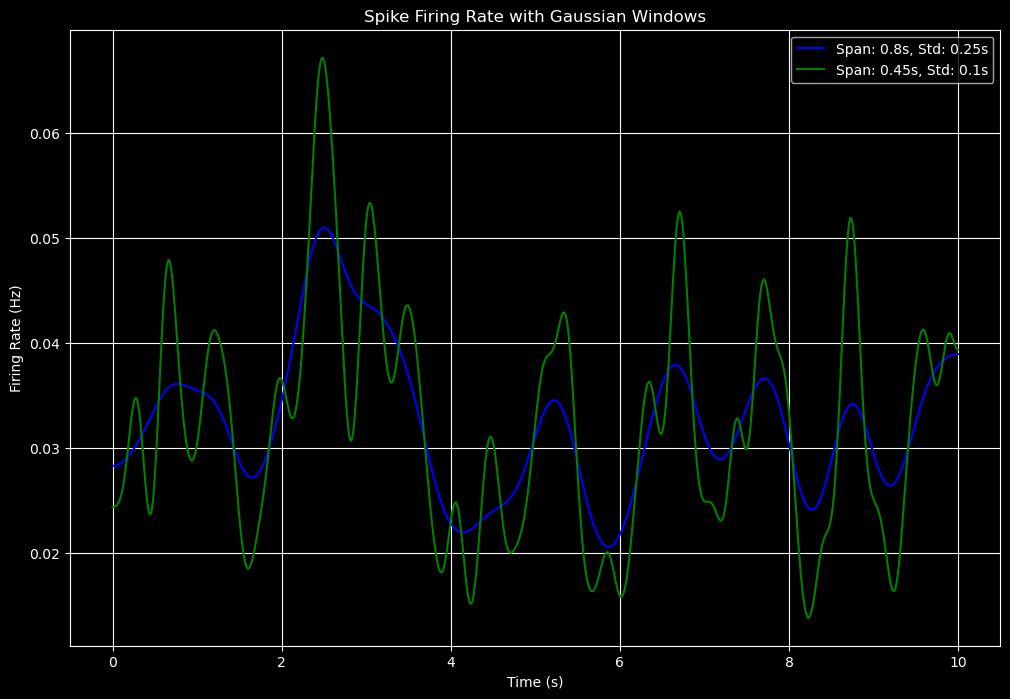

In [15]:
from scipy.ndimage import gaussian_filter1d

# function to calculate firing rate with Gaussian window
def gaussian_firing_rate(spike_train, window_span, std, bin_size):
    window_size = int(window_span / bin_size)
    std_bins = std / bin_size
    smoothed_spike_train = gaussian_filter1d(spike_train, std_bins)
    return smoothed_spike_train

# window parameters
windows = [
    {'span': 0.8, 'std': 0.25, 'color': 'blue', 'label': 'Span: 0.8s, Std: 0.25s'},
    {'span': 0.45, 'std': 0.1, 'color': 'green', 'label': 'Span: 0.45s, Std: 0.1s'}
]

# plot firing rates
plt.figure(figsize=(12, 8))

for window in windows:
    rate = gaussian_firing_rate(spike_train, window['span'], window['std'], bin_size)
    plt.plot(np.arange(num_bins) * bin_size, rate, color=window['color'], label=window['label'])

plt.title('Spike Firing Rate with Gaussian Windows')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True)
plt.show()

Section 4 Question A

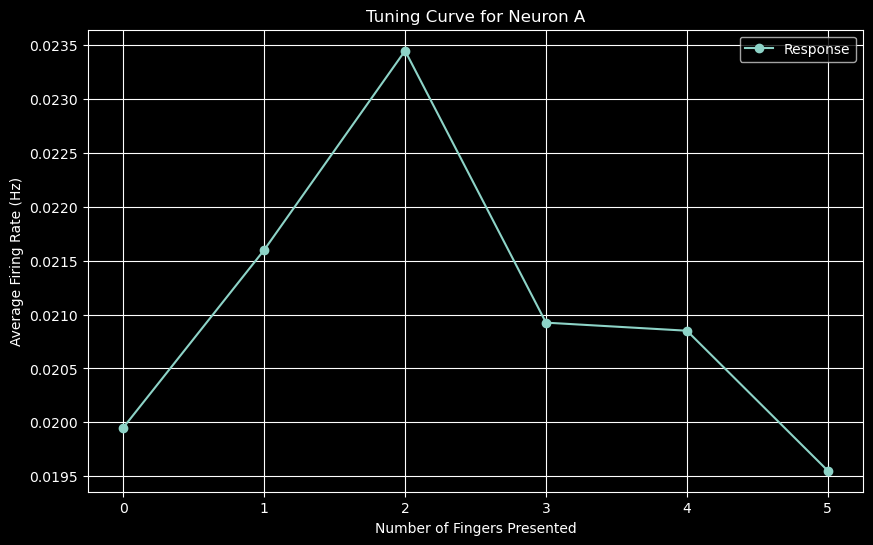

In [16]:
import pickle

# Load the data
with open('q1_neuronA.pkl', 'rb') as file:
    data = pickle.load(file)

# Parameters
sampling_rate = 1000  # samples per second
baseline_window = 0.2  # seconds
response_window = 0.8  # seconds
num_fingers = data.shape[0]
num_trials = data.shape[1]

# Calculate baseline firing rates (first 0.2 seconds)
baseline_start = 0
baseline_end = int(baseline_window * sampling_rate)
baseline_firing_rates = np.mean(data[:, :, baseline_start:baseline_end], axis=2)

# Calculate response firing rates (0.2 to 1 second)
response_start = int(0.2 * sampling_rate)
response_end = int(1.0 * sampling_rate)
response_firing_rates = np.mean(data[:, :, response_start:response_end], axis=2)

# Calculate the average firing rates across trials
baseline_avg_firing_rates = np.mean(baseline_firing_rates, axis=1)
response_avg_firing_rates = np.mean(response_firing_rates, axis=1)

# Plot the tuning curve
plt.figure(figsize=(10, 6))
plt.plot(range(num_fingers), response_avg_firing_rates, marker='o', label='Response')
plt.xlabel('Number of Fingers Presented')
plt.ylabel('Average Firing Rate (Hz)')
plt.title('Tuning Curve for Neuron A')
plt.grid(True)
plt.legend()
plt.show()

Section 4 Question C

In [17]:
# Calculate the average firing rate at each time point within the stimulus window (0.2s to 0.6s)
stimulus_window = data[:, :, 200:600]  # 0.2s to 0.6s, 200ms to 600ms
average_response = np.mean(stimulus_window, axis=(0, 1))

# Find the peak response time point within the stimulus window
peak_index = np.argmax(average_response)
peak_time = (200 + peak_index) / 1000  # Convert index to time in seconds

print(f"Peak time: {peak_time}s, Peak firing rate: {average_response[peak_index]}Hz")


Peak time: 0.41s, Peak firing rate: 0.06333333333333334Hz


In [18]:
# Define the 50 ms window around the peak (±25 ms)
window_start = max(0, peak_index + 200 - 25)
window_end = min(1000, peak_index + 200 + 25)
print(f"Peak window start: {window_start}, end: {window_end}")


Peak window start: 385, end: 435


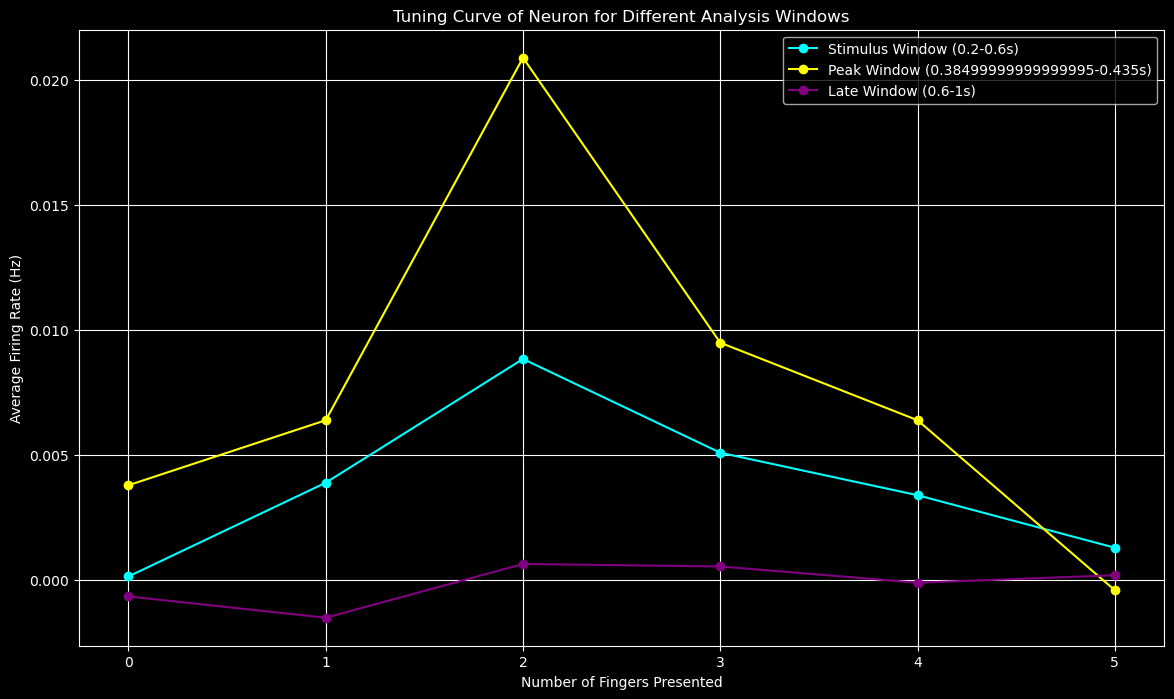

Variance for Stimulus Window (0.2-0.6s): 7.82222222222222e-06
Variance for Peak Window (0.38499999999999995-0.435s): 4.360888888888889e-05
Variance for Late Window (0.6-1s): 5.54513888888888e-07


In [19]:
# Calculate firing rates for different windows
def calculate_firing_rate(data, start_time, end_time, baseline_end=200):
    num_fingers, num_trials, num_timepoints = data.shape
    baseline_window = baseline_end
    analysis_window = end_time - start_time
    
    firing_rates = np.zeros((num_fingers,))
    
    for i in range(num_fingers):
        baseline_rate = np.mean(data[i, :, :baseline_window])
        response_rate = np.mean(data[i, :, start_time:end_time])
        firing_rates[i] = response_rate - baseline_rate
    
    return firing_rates

# Different windows for analysis
windows = {
    "Stimulus Window (0.2-0.6s)": (200, 600),
    f"Peak Window ({peak_time-0.025}-{peak_time+0.025}s)": (window_start, window_end),
    "Late Window (0.6-1s)": (600, 1000)
}

# Calculate firing rates for each window
firing_rates = {name: calculate_firing_rate(data, start, end) for name, (start, end) in windows.items()}

# Plotting tuning curves
plt.figure(figsize=(14, 8))
colors = ['cyan', 'yellow', 'purple']

for (name, rates), color in zip(firing_rates.items(), colors):
    plt.plot(range(6), rates, label=name, color=color, marker='o')

plt.title('Tuning Curve of Neuron for Different Analysis Windows')
plt.xlabel('Number of Fingers Presented')
plt.ylabel('Average Firing Rate (Hz)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate variance for different windows
def calculate_variance(firing_rates):
    variances = {}
    for name, rates in firing_rates.items():
        mean_rate = np.mean(rates)
        variance = np.mean((rates - mean_rate) ** 2)
        variances[name] = variance
    return variances

variances = calculate_variance(firing_rates)
for name, var in variances.items():
    print(f'Variance for {name}: {var}')

# Determining the best window
best_window = min(variances, key=variances.get)


Section 4 Question 3

In [20]:
# Load data
with open('q1_neuronB.pkl', 'rb') as f:
    neuronB = pickle.load(f)
with open('q1_neuronC.pkl', 'rb') as f:
    neuronC = pickle.load(f)
with open('q1_neuronD.pkl', 'rb') as f:
    neuronD = pickle.load(f)

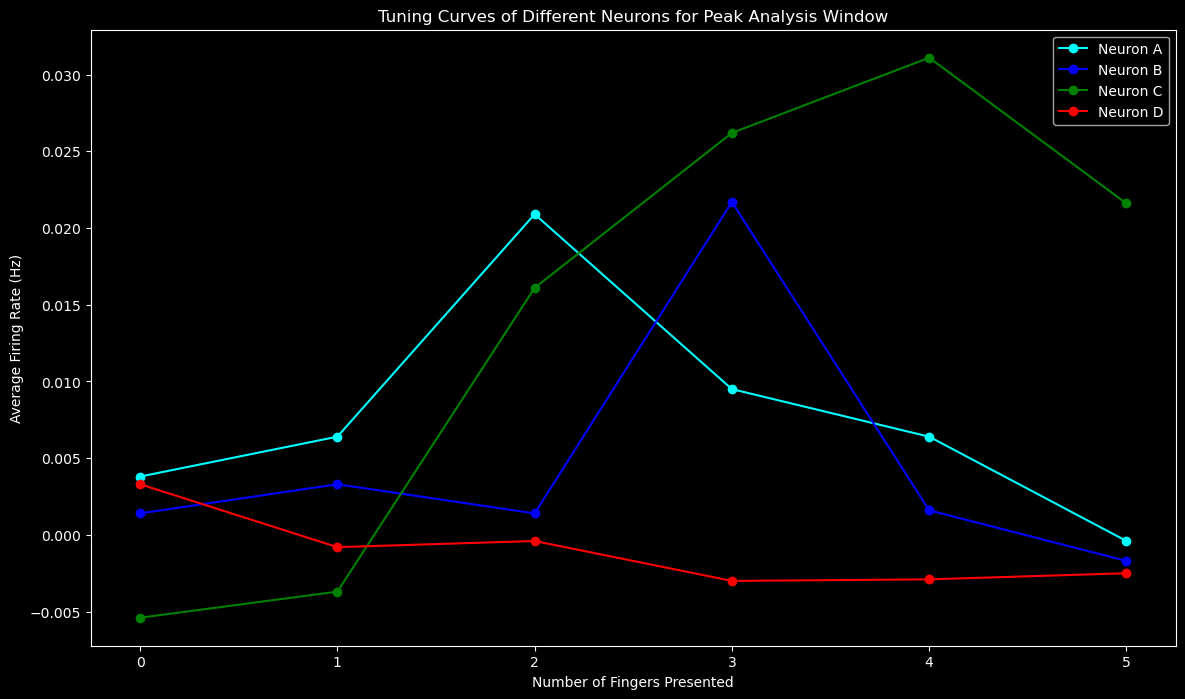

In [21]:
# Define the peak window based on previous results
peak_window_start = 385
peak_window_end = 435
baseline_end = 200

# Calculate firing rates for each neuron
firing_rates_B = calculate_firing_rate(neuronB, peak_window_start, peak_window_end, baseline_end)
firing_rates_C = calculate_firing_rate(neuronC, peak_window_start, peak_window_end, baseline_end)
firing_rates_D = calculate_firing_rate(neuronD, peak_window_start, peak_window_end, baseline_end)
firing_rates_A = calculate_firing_rate(data, peak_window_start, peak_window_end, baseline_end)  # Assuming 'data' contains neuron A's data


# Plotting tuning curves for all neurons
plt.figure(figsize=(14, 8))

plt.plot(range(6), firing_rates_A, label='Neuron A', color='cyan', marker='o')
plt.plot(range(6), firing_rates_B, label='Neuron B', color='blue', marker='o')
plt.plot(range(6), firing_rates_C, label='Neuron C', color='green', marker='o')
plt.plot(range(6), firing_rates_D, label='Neuron D', color='red', marker='o')

plt.title('Tuning Curves of Different Neurons for Peak Analysis Window')
plt.xlabel('Number of Fingers Presented')
plt.ylabel('Average Firing Rate (Hz)')
plt.legend()

plt.show()

Section 4 Question D

In [22]:
# Load the new data
with open('q1_decode_data.pkl', 'rb') as file:
    decode_data = pickle.load(file)

# Display the shape to understand the structure
print(decode_data.shape)

(4, 1000)


In [23]:
def calculate_firing_rate_new_trial(data, start_time, end_time, baseline_end=200):
    baseline_rate = np.mean(data[:, :baseline_end], axis=1)
    response_rate = np.mean(data[:, start_time:end_time], axis=1)
    return response_rate - baseline_rate

# Use the peak window for the new trial data
average_firing_rates = calculate_firing_rate_new_trial(decode_data, peak_window_start, peak_window_end, baseline_end)
print(f'Average firing rates during peak window: {average_firing_rates}')

Average firing rates during peak window: [ 0.01   0.045  0.02  -0.015]


In [24]:
# Tuning curves (previously calculated)
tuning_curves = {
    'A': firing_rates_A,  
    'B': firing_rates_B,  
    'C': firing_rates_C,  
    'D': firing_rates_D  
}

# Names of neurons
neurons = ['A', 'B', 'C', 'D']

# Find the closest match for each neuron
def find_closest_match(firing_rate, tuning_curve):
    differences = np.abs(np.array(tuning_curve) - firing_rate)
    return np.argmin(differences)

predictions = []
for i, neuron in enumerate(neurons):
    prediction = find_closest_match(average_firing_rates[i], tuning_curves[neuron])
    predictions.append(prediction)
    print(f'Neuron {neuron} predicts {prediction} fingers')




Neuron A predicts 3 fingers
Neuron B predicts 3 fingers
Neuron C predicts 5 fingers
Neuron D predicts 3 fingers
